In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Parameters
J = 1.0
t_max = 10
n_steps = 100
times = np.linspace(0, t_max, n_steps)

backend = AerSimulator(method='statevector')

In [7]:
def build_circuit(t, J):
    qc = QuantumCircuit(1)
    qc.x(0)               # prepare |+>
    qc.rx(2 * J * t, 0)   # evolve under -J σ^x
    qc.save_statevector()  # ✅ key line
    return qc

z_expectations = []

for t in times:
    qc = build_circuit(t, J)
    result = backend.run(qc).result()
    sv = result.data(0)['statevector']   # ✅ works now
    z_exp = Statevector(sv).expectation_value(Pauli("Z"))
    z_expectations.append(z_exp.real)

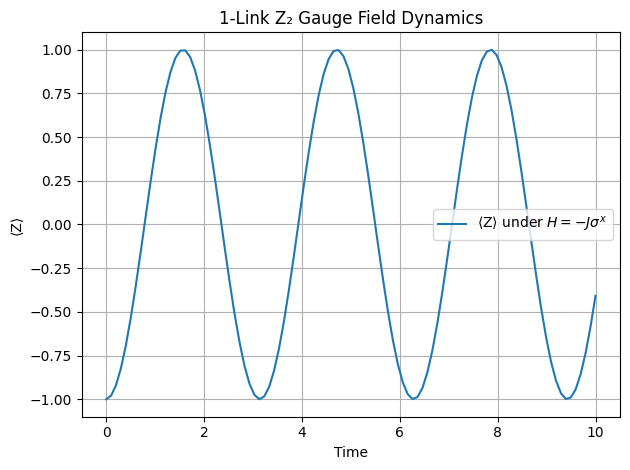

In [8]:
plt.plot(times, z_expectations, label="⟨Z⟩ under $H = -J \\sigma^x$")
plt.xlabel("Time")
plt.ylabel("⟨Z⟩")
plt.title("1-Link Z₂ Gauge Field Dynamics")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
